In [41]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio

def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    return a, b


In [33]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Noise_sweep2025-04-09-10-56-15.mat
[2] -----------> Noise_sweep_best_gain2025-04-14-12-19-40.mat
[3] -----------> Noise_sweep_best_gain2025-04-14-13-47-39.mat
[4] -----------> Rough_gain_sweep2025-04-08-12-22-07.mat


In [71]:
file = folders[3]
mat = sio.loadmat(initial_folder+"\\"+file)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pump_powers', 'pump_freqs', 'volts', 'data_gain', 'data_mag', 'data_pha', 'fft_freq'])

In [72]:
data_gain = mat['data_gain']
print(data_gain.shape)
volts = mat['volts'][0]
print(volts[1])
pump_freqs = mat['pump_freqs'][0]
print(pump_freqs[2])
pump_powers = mat['pump_powers'][0]
print(pump_powers)
data_mag = mat['data_mag'] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

(11, 36, 2)
1.23
10020000000.0
[6.6 7.9]
(11, 36, 2, 2, 101)
(11, 36, 2, 2, 101)
(101,)


In [73]:
mag_1hz_arr = np.zeros((len(volts), len(pump_freqs), len(pump_powers)))
mag_1hz_arr_ref = np.zeros((len(volts), len(pump_freqs), len(pump_powers)))

pha_1hz_arr = np.zeros((len(volts), len(pump_freqs), len(pump_powers)))
pha_1hz_arr_ref = np.zeros((len(volts), len(pump_freqs), len(pump_powers)))
hz1_idx = 60 
for dc_idx in range(len(volts)):
    for pp_idx in range(len(pump_powers)):
        for pf_idx in range(len(pump_freqs)):

            selected_mag_point = data_mag[dc_idx, pf_idx, pp_idx]
            selected_pha_point = data_pha[dc_idx, pf_idx, pp_idx]

            if selected_mag_point[0,hz1_idx] != 0: 
                
                x = fft_freq[51:]
                y = selected_mag_point[0,51:]
                am, bm = linear_fit(np.log(x[:-30]), np.log(y[:-30]))
                mag_1hz_arr[dc_idx, pf_idx, pp_idx] = linear_func(np.log(1), am, bm)
                
                y = selected_mag_point[1,51:]
                am, bm = linear_fit(np.log(x[:-30]), np.log(y[:-30]))
                mag_1hz_arr_ref[dc_idx, pf_idx, pp_idx] = linear_func(np.log(1), am, bm)
                
                y = selected_pha_point[0,51:]
                ap, bp = linear_fit(np.log(x[:-30]), np.log(y[:-30]))
                pha_1hz_arr[dc_idx, pf_idx, pp_idx] = linear_func(np.log(1), ap, bp)
                
                y = selected_pha_point[1,51:]
                ap, bp = linear_fit(np.log(x[:-30]), np.log(y[:-30]))
                pha_1hz_arr_ref[dc_idx, pf_idx, pp_idx] =linear_func(np.log(1), ap, bp)
                
                

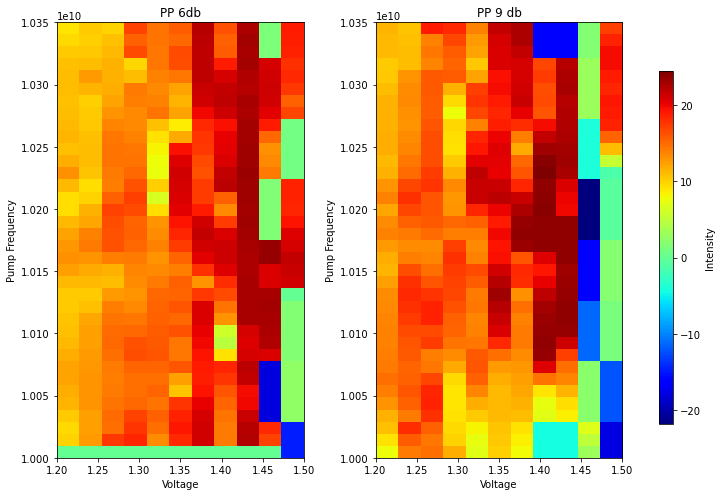

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

# Get the shared vmin/vmax across both plots
vmin = data_gain.min()
vmax = data_gain.max()

# Define extent: [xmin, xmax, ymin, ymax]
extent = [volts[0], volts[-1], pump_freqs[0], pump_freqs[-1]]

# Plot both heatmaps with shared color scale
im0 = ax[0].imshow(data_gain[:, :, 0].T, cmap='jet', 
                   vmin=vmin, vmax=vmax, aspect='auto', extent=extent, origin='lower')
im1 = ax[1].imshow(data_gain[:, :, 1].T, cmap='jet',
                   vmin=vmin, vmax=vmax, aspect='auto', extent=extent, origin='lower')

# Set titles and labels
ax[0].set_title('PP 6db')
ax[1].set_title('PP 9 db')
ax[0].set_xlabel('Voltage')
ax[0].set_ylabel('Pump Frequency')
ax[1].set_xlabel('Voltage')
ax[1].set_ylabel('Pump Frequency')

# Adjust layout
fig.tight_layout(rect=[0, 0, 0.9, 1])

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im0, cax=cbar_ax, label='Intensity')

plt.show()


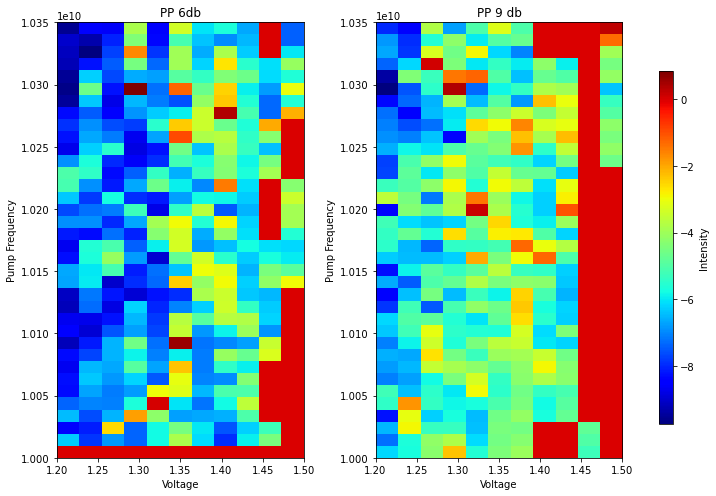

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

# Get the shared vmin/vmax across both plots
vmin = mag_1hz_arr.min()
vmax = mag_1hz_arr.max()

# Define extent: [xmin, xmax, ymin, ymax]
extent = [volts[0], volts[-1], pump_freqs[0], pump_freqs[-1]]

# Plot both heatmaps with shared color scale
im0 = ax[0].imshow(mag_1hz_arr[:, :, 0].T, cmap='jet', 
                   vmin=vmin, vmax=vmax, aspect='auto', extent=extent, origin='lower')
im1 = ax[1].imshow(mag_1hz_arr[:, :, 1].T, cmap='jet',
                   vmin=vmin, vmax=vmax, aspect='auto', extent=extent, origin='lower')

# Set titles and labels
ax[0].set_title('PP 6db')
ax[1].set_title('PP 9 db')
ax[0].set_xlabel('Voltage')
ax[0].set_ylabel('Pump Frequency')
ax[1].set_xlabel('Voltage')
ax[1].set_ylabel('Pump Frequency')

# Adjust layout
fig.tight_layout(rect=[0, 0, 0.9, 1])

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im0, cax=cbar_ax, label='Intensity')

plt.show()

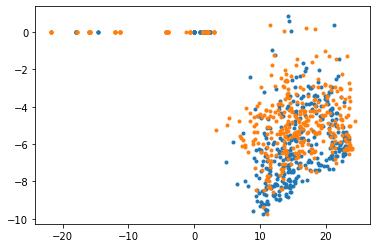

In [76]:
plt.plot(data_gain[:, :, 0].ravel(), mag_1hz_arr[:, :, 0].ravel(), '.')
plt.plot(data_gain[:, :, 1].ravel(), mag_1hz_arr[:, :, 1].ravel(), '.')

In [77]:
# Gradient

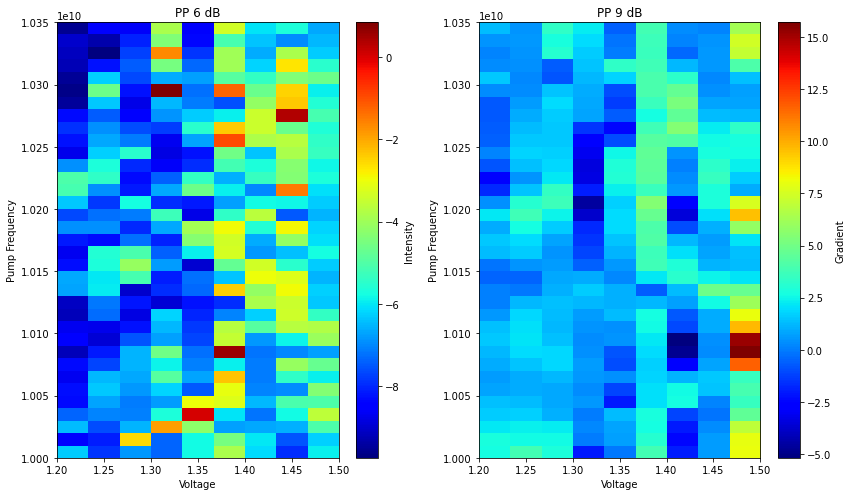

In [100]:
grad_y, grad_x = np.gradient(data_gain[:-2, 1:, 0])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))

vmin = mag_1hz_arr.min()
vmax = mag_1hz_arr.max()

extent = [volts[0], volts[-1], pump_freqs[0], pump_freqs[-1]]

# Plot both heatmaps
im0 = ax[0].imshow(mag_1hz_arr[:-2, 1:, 0].T, cmap='jet', 
                   vmin=vmin, vmax=vmax, aspect='auto', extent=extent, origin='lower')

im1 = ax[1].imshow(grad_y.T, cmap='jet',
                   aspect='auto', extent=extent, origin='lower')  # no vmin/vmax shared here

# Titles and labels
ax[0].set_title('PP 6 dB')
ax[1].set_title('PP 9 dB')
ax[0].set_xlabel('Voltage')
ax[0].set_ylabel('Pump Frequency')
ax[1].set_xlabel('Voltage')
ax[1].set_ylabel('Pump Frequency')

# Colorbars — separate for each subplot
cbar0 = fig.colorbar(im0, ax=ax[0], orientation='vertical', label='Intensity')
cbar1 = fig.colorbar(im1, ax=ax[1], orientation='vertical', label='Gradient')

# Adjust layout
fig.tight_layout()

plt.show()


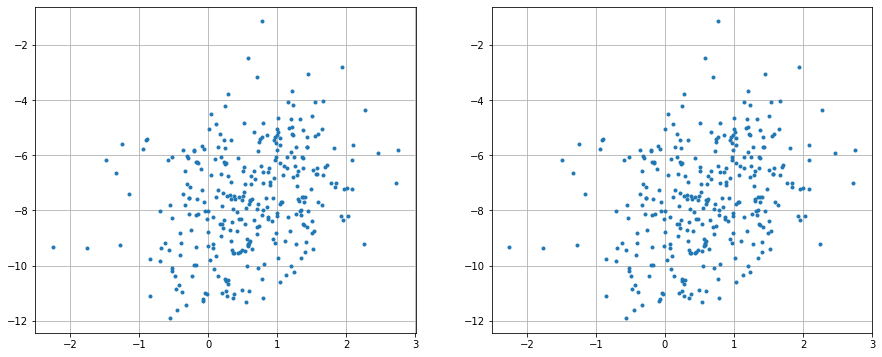

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].grid()
ax[1].grid()

ax[0].plot(np.log(np.abs( np.sqrt(grad_x**2 + grad_y**2).ravel())), pha_1hz_arr[:-2, 1:, 0].ravel(),  '.')
ax[1].plot(np.log(np.abs( np.sqrt(grad_x**2 + grad_y**2).ravel())), pha_1hz_arr[:-2, 1:, 0].ravel(), '.')